# Sign Language
Data Analysis - ISAE 2025/2026

In [17]:
import os  # path handling

import matplotlib.pyplot as plt
import numpy as np  # numpy arrays operation

# inline plots for nicer viewing
%matplotlib inline
from scipy import ndimage

In [18]:
dataPath = "./data"  # path to folder containing the sign language data
XFile = os.path.join(dataPath, "X.npy")  # X
YFile = os.path.join(dataPath, "Y.npy")  # Y

## 1 - Data import and formatting


In [19]:
# Load input data and labels
X = np.load(XFile)
Y = np.load(YFile)
print(X.shape)
print(Y.shape)

(2062, 64, 64)
(2062, 10)


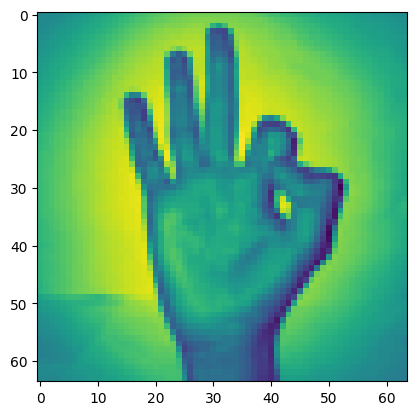

Label of image is:
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [26]:
# Display an image and its label
imgIdx = 55
plt.imshow(X[imgIdx])
plt.show()
print("Label of image is:")
print(Y[imgIdx])

In [ ]:
# Let's define a function that converts the one-hot encoded labels to the corresponding sign 
# language value.
def labelToSignNumber(label):
    """ 
    Convert a one-hot encoded label to the
    corresponding sign language value.
    Mapping it with the truth value.

    Args:
      label: (numpy.array) One-hot encoded label

    Returns: (float) Sign language value
    """
    labelValue = np.argmax(label)
    mapping = {0: 9, 1: 0, 2: 7, 3: 6, 4: 1, 5: 8, 6: 4, 7: 3, 8: 2, 9: 5}
    return mapping[labelValue]

Image 55 is a: 9


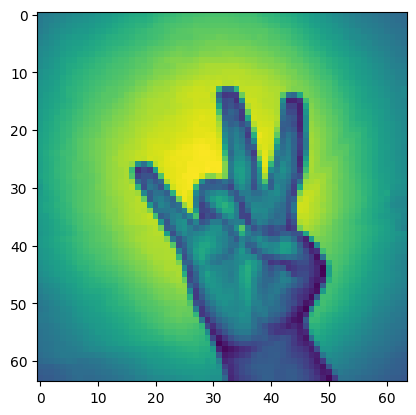

In [22]:
# Let's test our function
y55 = labelToSignNumber(Y[55])
print("Image 55 is a: {}".format(y55))
plt.imshow(X[600])
plt.show()

## 2 - Features construction with filters

In [23]:
# Let's apply some edge detectors on an example image
imgIdx = 900  # select an image index
img = X[imgIdx]  # get the grayscale image matrix

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

gx = ndimage.convolve(img, sobel_x)
gy = ndimage.convolve(img, sobel_y)

edges_sobel = np.sqrt(gx**2 + gy**2)

laplacian = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

edges_laplacien = ndimage.convolve(img, laplacian)

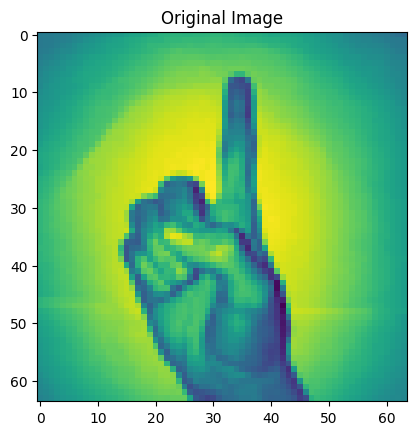

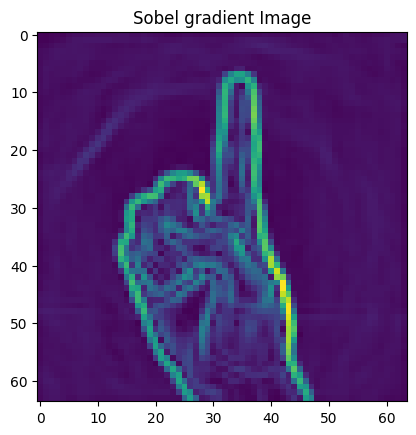

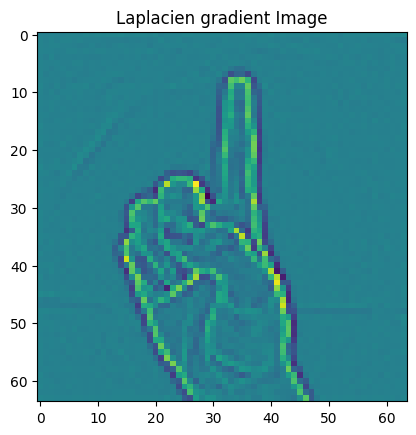

In [ ]:
# Let's display the image
def displayImg(_img, title=""):
    plt.imshow(_img)
    plt.title(title)
    plt.show()


displayImg(img, "Original Image")
displayImg(edges_sobel, "Sobel gradient Image")
displayImg(edges_laplacien, "Laplacien gradient Image")